                                      Name : Stuti Mathur
                                      Roll No. : 210108050
        Title : Fake Review Detection Using Deep Neural Networks with Multimodal Feature Fusion Method

                                         -> Motivation:

Online reviews strongly influence consumer behavior. However, platforms like Amazon, Yelp, and TripAdvisor are often flooded with ""fake reviews"" — misleading feedback generated to either promote or sabotage products. These fake reviews distort truth, deceive buyers, and undermine trust in digital marketplaces.

As e-commerce thrives, "automated and intelligent systems" to detect fake reviews have become vital. This project aims to understand how "deep learning and multimodal feature fusion" can effectively identify fake reviews by learning from textual content, user behavior, and metadata.


                        -> Multimodal Learning: A Quick Historical Overview

Multimodal learning refers to the "integration of information from multiple modalities" —such as text, image, and behavior — for more robust machine understanding.

Timeline Highlights:
- Pre-2016: Focused on single-modality methods (BoW, TF-IDF + SVM).
- 2017–2019: Rise of "word embeddings" (Word2Vec, GloVe) + simple CNNs.
- 2019–2021: Introduction of "BERT" and "transformers" revolutionized NLP. Fake review detection adopted "contextualized embeddings".
- 2022–2024: Emphasis on "multimodal fusion" using BERT + metadata + attention layers (e.g., TextCNN, BiGRU, Vision Transformers).
- 2024+: Hierarchical and graph-based DL models now fuse user metadata, text, and even network structure for fake detection.

Multimodal fusion has become critical for "capturing deeper semantics" in noisy or deceptive data like fake reviews.


                            -> Learnings from the Reviewed Works

1. BMTBA Model (Xin Li et al.)

- Architecture:

  BERT + TextCNN + BiGRU + Attention:

    - BERT handles contextual word embedding, capturing rich semantic nuances.
    - TextCNN captures local n-gram level patterns in review text.
    - BiGRU (Bidirectional Gated Recurrent Unit) models long-term dependencies and sequential flow of information.
    - Attention focuses on important tokens/words to prioritize influential parts of the text.

- Innovation:

  Review Weekday (RW) Feature:

  - An original behavioral feature identifying the day of the week a review was posted.
  - Fake reviews are evenly distributed across all weekdays (since they're often scheduled).
  - Genuine users tend to post after actual purchases (e.g., weekends → reviews on Sundays/Mondays).
  - This subtle time-distribution feature helps the model capture unnatural patterns.

- Dual Model Strategy:

  The authors train separate models for detecting fake-positive and fake-negative reviews:

  - Fake-positive: Meant to artificially promote a product.
  - Fake-negative: Meant to damage a competitor's reputation.
  This accounts for different linguistic and behavioral characteristics in the two classes of fakes.

- Result:

  - Achieved 94.68% accuracy on Yelp datasets.
  - Outperformed models without RW or without separating fake-positive/negative reviews.



2. HACNN Model (Bhoompally Venkatesh et al.)

- Architecture:

  Hierarchical Attention Network (HAN):

  - Understands word → sentence → document structure using nested attention.
  - Suitable for long reviews with varying emphasis.

  Deep Convolutional Neural Network (DCNN):

  - Captures spatial and local patterns (punctuation, stylistic clues).

  Combined into a HACNN model that handles both semantics and structure effectively.

- Feature Engineering:

  Uses 15 handcrafted features, including:

  - Textual: review length, number of capitalized words, punctuation count.
  - Behavioral: rating deviation, review frequency, sentiment deviation.
  Helps the model consider both what is written and how it’s written or posted.

- Optimization:

  Introduces Adam Archery Algorithm (AAA):

  - Hybrid of Adam optimizer and Archery Algorithm (a meta-heuristic technique).
  - Enhances convergence and generalization.

- Data Imbalance Handling:

  Uses SMOTE (Synthetic Minority Oversampling Technique) to:

  - Augment minority class samples (fake reviews).
  - Improve performance on imbalanced datasets.

- Result:

  Achieved 91.2% accuracy, notable for handling imbalance and combining handcrafted + learned features.

---

3. Survey on Multimodal Fake News Detection (ETASR, 2024)

Though the focus is on fake news, its findings directly apply to fake review detection, especially in terms of fusion techniques and deep learning trends.

- Key Insights:

  Advanced Attention Mechanisms:

  - Introduction of co-attention, self-attention, hierarchical attention to capture nuanced dependencies.
  - Example: Co-attention can model relationships between review text and metadata (e.g., time, reviewer credibility).

- Fusion Strategies:

  - Early Fusion (data-level): Merging raw modalities before modeling (e.g., combining text with numerical rating).
  - Intermediate Fusion (feature-level): Concatenating embeddings or learned representations from different sources.
  - Late Fusion (decision-level): Averaging predictions from different modality-specific models.
  - The review emphasizes that intermediate fusion (especially using attention) is most effective.

- Model Trends:

  - Recommends using transformers (like BERT, RoBERTa, ViT) for both text and visual modalities.
  - Encourages hierarchical and multi-head attention for deep semantic reasoning, even in short reviews.

- Application to Fake Reviews:

- If product images, timestamps, or user networks are available, these can be multimodally fused with review text.
- Transformers help generalize well even with subtle manipulation patterns in fake reviews.


                          -> Code Cell: Feature Engineering Demo

Here’s a simple feature engineering example using review text and a synthetic feature for review posting day (RW):

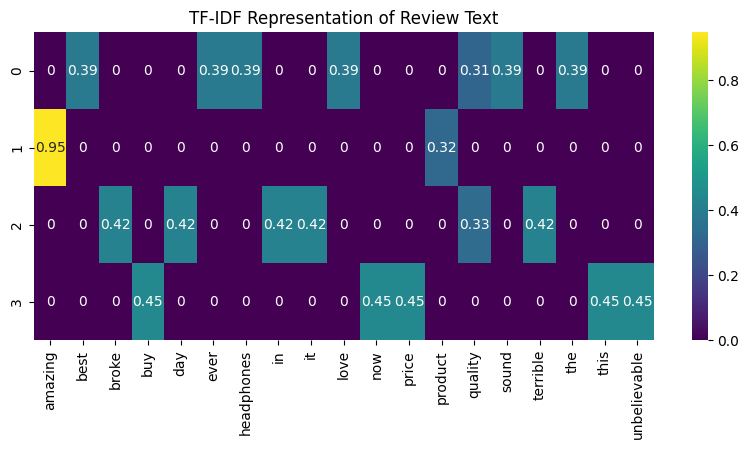

  day_of_week  rw_numeric  label
0      Monday           1      0
1     Tuesday           2      1
2      Sunday           0      0
3   Wednesday           3      1


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Example fake review dataset (simulate)
data = {
    'review': [
        "Best headphones ever! Love the sound quality!",  # likely real
        "Amazing amazing amazing product!!!",             # likely fake
        "It broke in 1 day. Terrible quality.",           # likely real
        "Buy this now! Unbelievable price!",              # likely fake
    ],
    'day_of_week': ['Monday', 'Tuesday', 'Sunday', 'Wednesday'],
    'label': [0, 1, 0, 1]  # 0 = real, 1 = fake
}

df = pd.DataFrame(data)

# TF-IDF on review content
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['review']).toarray()
tfidf_df = pd.DataFrame(X_tfidf, columns=tfidf.get_feature_names_out())

# Visualize TF-IDF values
plt.figure(figsize=(10, 4))
sns.heatmap(tfidf_df, annot=True, cmap='viridis')
plt.title("TF-IDF Representation of Review Text")
plt.show()

# Add RW feature (encoding day)
df['rw_numeric'] = df['day_of_week'].map({
    'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3,
    'Thursday': 4, 'Friday': 5, 'Saturday': 6
})

print(df[['day_of_week', 'rw_numeric', 'label']])

                                   -> What Surprised Me:

- Fake reviews show consistent temporal patterns, unlike genuine ones.

- Combining multiple modalities (text, metadata, behavior) significantly improves performance—even over sophisticated single-modality models.

- Hierarchical attention allows the model to zoom in on subtle cues hidden within words/sentences.

                                   -> Scope for Improvement:

- Public datasets lack diversity in domains and languages.

- More work is needed in explainable AI: why was a review classified as fake?

- Real-time detection under heavy web traffic remains a challenge.

                                  -> References & Resources: 

- Xin Li, Lirong Chen – "Fake Review Detection Using Deep Neural Networks with Multimodal Feature Fusion Method" – IEEE ICPADS 2023.

- Bhoompally Venkatesh – "HACNN: Hierarchical Attention Convolutional Neural Network for Fake Review Detection" – SNAM, 2024.

- Abduljaleel & Ali – "Deep Learning and Fusion Mechanism-based Multimodal Fake News Detection" – ETASR, 2024.